## Cancer Diagnosis Capstone Project Exploratory Data Analysis

#### Introduction to EDA
This is the second section of the Cancer diagnosis capstone project in which we will explore and attempt to find patterns and gather information from the data.  The first part of the project, in which we cleaned the data, can be found [here.](https://github.com/dawgtree/CapstoneThreeProject/blob/main/Cancer%20Diagnosis%20Capstone%20Project%20Data%20Wrangling.ipynb)

Some of the questions that I am trying to answer:<br>
How strongly correlated are the variables? Particularly, how strongly correlated are the mean, standard error, and "worst" of each variable? Are they all needed?<br>
Do we want to keep all of the variables for the final modeling?<br>
Are there any variables that are more strongly correlated to the diagnosis?

I want to use visualization in this notebook along with visualization in Tableau, which can be found here.

#### Importing and Examining data
We will first import important modules and look at the data that we have.  We will also look at the distribution of the data with a histogram.  I would like to see if it demonstrates a normal curve.  Also we will compute Empirical Distribution Function (ECDF) to visualize how the data is distributed.  For now we are going to focus on the means of each variable.

In [38]:
#Import necessary modules.  Note that these all might not be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Load the data
cancer = pd.read_csv('cancer.csv', index_col=0)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


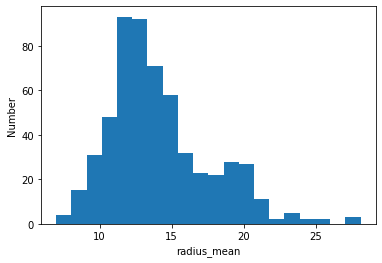

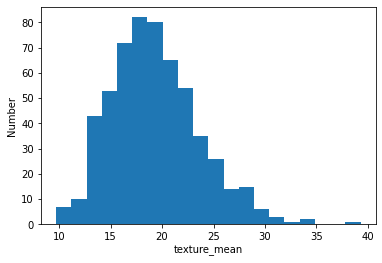

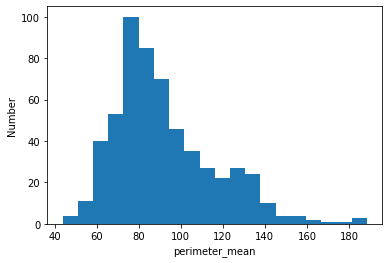

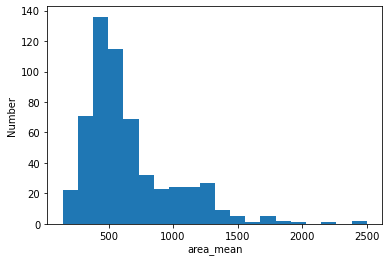

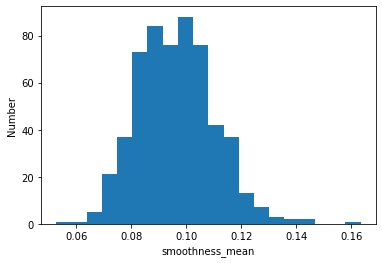

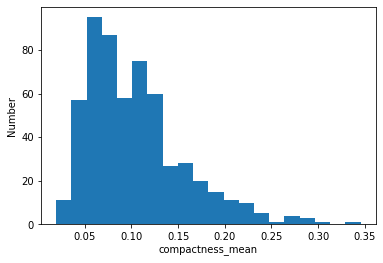

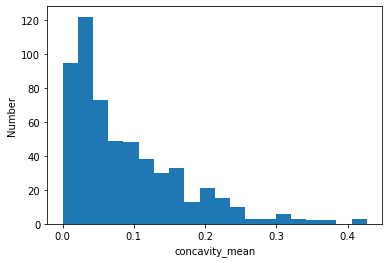

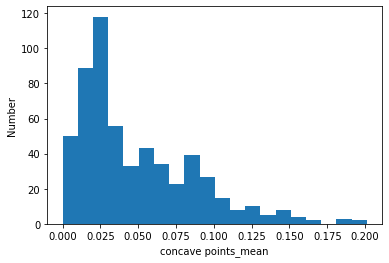

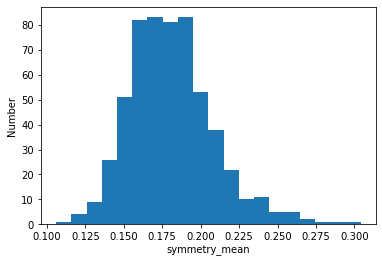

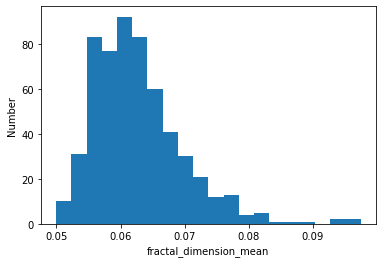

In [6]:
#Create a for loop that will graph each value we are looking for quickly
tumor_means = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
for i in tumor_means:
    plt.hist(cancer[i], bins=20)
    plt.xlabel(i)
    plt.ylabel('Number')
    plt.show()

Most of the data has a right skew, but it might be better to visualize the differences between benign and malignant tumors to see if those data points that are close to outliers tend to favor one category.

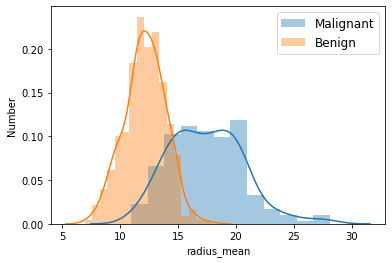

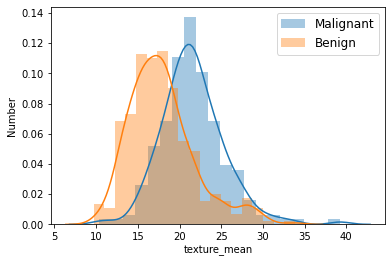

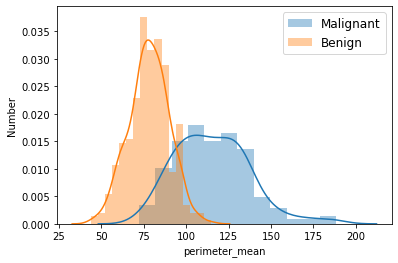

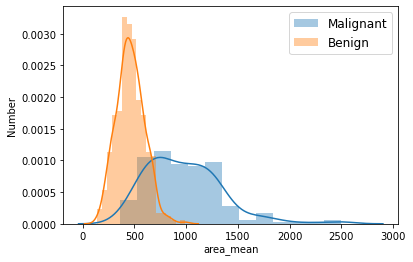

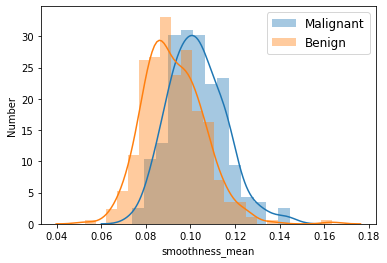

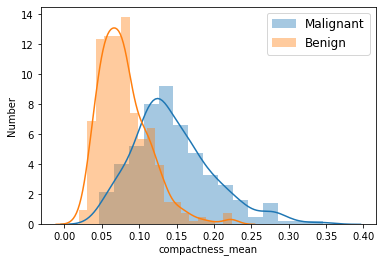

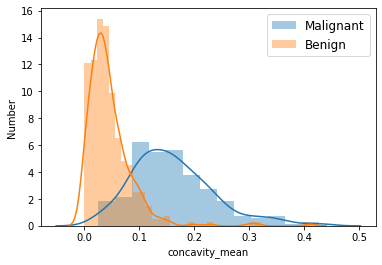

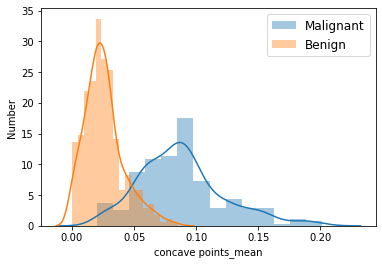

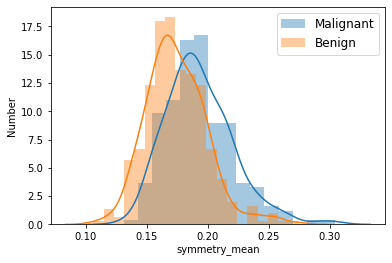

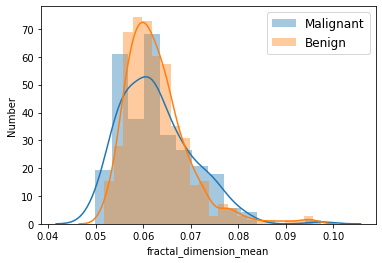

In [23]:
df_m = cancer[cancer['diagnosis'] == 'M']
df_b = cancer[cancer['diagnosis'] == 'B']

for i in tumor_means:
    sns.distplot(df_m[i], label= 'Malignant')
    sns.distplot(df_b[i], label= 'Benign')
    plt.legend(prop={'size': 12})
    plt.xlabel(i)
    plt.ylabel('Number')
    plt.show()

That is a lot of potential information that can be gathered.  For most of the graphs, there is a noticeable difference between malignant and benign tumor sizes. For radius, texture, perimeter, area, compactness, concavity, and concave points, malignant is noticeably larger than benign. Smoothness is closer but there is a slight difference.  Fractal dimension is too hard to tell.  I think it is interesting that malignant tumors often seem more widely distributed, and benign tumors have a smaller range.

In [9]:
#Set up an ECDF function that can be used multiple times and graphed.
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1) / n
    return x, y

No handles with labels found to put in legend.


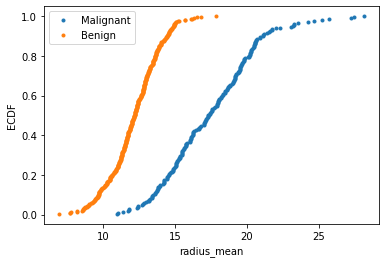

No handles with labels found to put in legend.


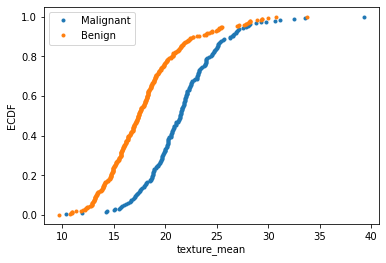

No handles with labels found to put in legend.


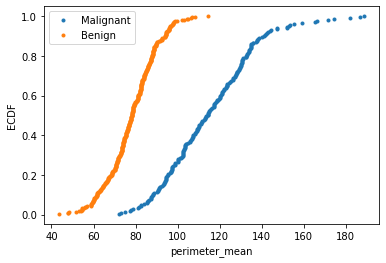

No handles with labels found to put in legend.


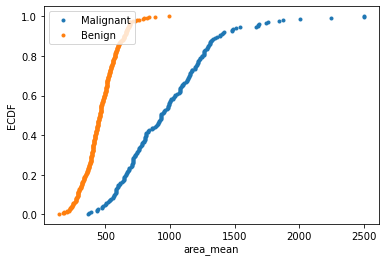

No handles with labels found to put in legend.


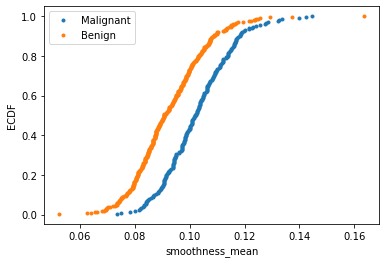

No handles with labels found to put in legend.


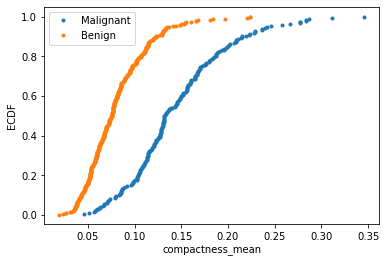

No handles with labels found to put in legend.


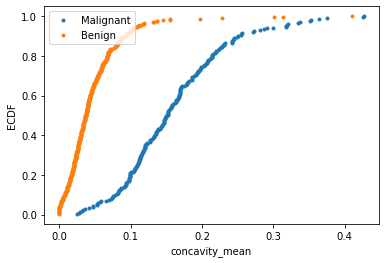

No handles with labels found to put in legend.


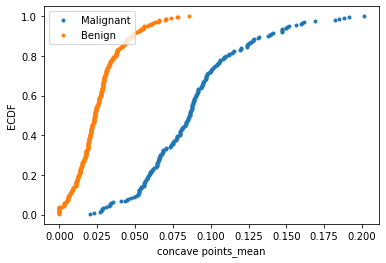

No handles with labels found to put in legend.


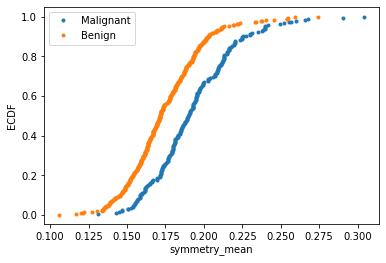

No handles with labels found to put in legend.


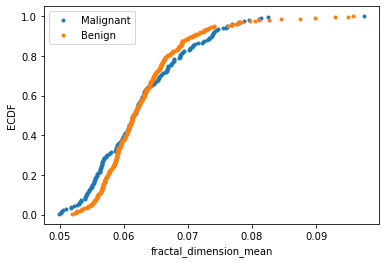

In [15]:
for i in tumor_means:
    plt.legend(prop={'size': 12})
    x1, y1= ecdf(df_m[i])
    x2, y2= ecdf(df_b[i])
    plt.plot(x1, y1, marker='.',linestyle='none')
    plt.plot(x2, y2, marker='.',linestyle='none')
    plt.legend(loc="upper left", labels=['Malignant','Benign'])
    plt.xlabel(i)
    plt.ylabel('ECDF')
    plt.show()

This is another way to see the information.  It confirms that malignant typically has a higher value than benign.  Let's look at some important values.

In [32]:
#Look at mean differences
for i in tumor_means:
    print('Mean for malignant tumors for {0} is {1}'.format(i,df_m[i].mean()))
    print('Mean for benign tumors for {0} is {1}'.format(i,df_b[i].mean()))
    percentage_increase = round((df_m[i].mean()-df_b[i].mean())/df_b[i].mean() * 100,2)
    print('The percentage increase from benign to malignant for {0} is {1}'.format(i,(percentage_increase)))

Mean for malignant tumors for radius_mean is 17.46283018867925
Mean for benign tumors for radius_mean is 12.14652380952381
The percentage increase from benign to malignant for radius_mean is 43.77
Mean for malignant tumors for texture_mean is 21.60490566037735
Mean for benign tumors for texture_mean is 17.914761904761892
The percentage increase from benign to malignant for texture_mean is 20.6
Mean for malignant tumors for perimeter_mean is 115.36537735849062
Mean for benign tumors for perimeter_mean is 78.07540616246497
The percentage increase from benign to malignant for perimeter_mean is 47.76
Mean for malignant tumors for area_mean is 978.3764150943397
Mean for benign tumors for area_mean is 462.79019607843145
The percentage increase from benign to malignant for area_mean is 111.41
Mean for malignant tumors for smoothness_mean is 0.10289849056603775
Mean for benign tumors for smoothness_mean is 0.09247764705882357
The percentage increase from benign to malignant for smoothness_mean

#### P-Values

All of them have a positive difference that seems fairly signficant except for fractal dimension mean.  How can we tell if these percentages are significant though?  It would be easy to do some hypothesis testing to determine the p-value.  We will say the null hypothesis is that the factors do not determine whether the tumor is benign or malignant.  If the p-value is less thatn 0.05, we can reject the null hypothesis and say these factors are significant.

In [34]:
for i in tumor_means:
    t_test= stats.ttest_ind(df_m[i],df_b[i])
    print('The p-value for {0} is {1}'.format(i,t_test[1]))

The p-value for radius_mean is 8.465940572262422e-96
The p-value for texture_mean is 4.0586360478980736e-25
The p-value for perimeter_mean is 8.43625103617473e-101
The p-value for area_mean is 4.734564310307344e-88
The p-value for smoothness_mean is 1.0518503592032013e-18
The p-value for compactness_mean is 3.9382631058873895e-56
The p-value for concavity_mean is 9.966555755072963e-84
The p-value for concave points_mean is 7.101150161057422e-116
The p-value for symmetry_mean is 5.733384028466827e-16
The p-value for fractal_dimension_mean is 0.7599368037256238


Not surprising that all of these have a very low p-value except for the fractal dimensions, so all of these factors are significant except for fractal dimensions.  It will be safe to remove that from consideration for our model.

We will also just look at the median differences to take into account potential outliers.

In [33]:
for i in tumor_means:
    print('Median for malignant tumors for {0} is {1}'.format(i,df_m[i].median()))
    print('Median for benign tumors for {0} is {1}'.format(i,df_b[i].median()))
    median_difference = round(df_m[i].median()-df_b[i].median(),2)
    print('The median difference between malignant and benign tumors for {0} is {1}'.format(i,median_difference))

Median for malignant tumors for radius_mean is 17.325000000000003
Median for benign tumors for radius_mean is 12.2
The median difference between malignant and benign tumors for radius_mean is 5.13
Median for malignant tumors for texture_mean is 21.46
Median for benign tumors for texture_mean is 17.39
The median difference between malignant and benign tumors for texture_mean is 4.07
Median for malignant tumors for perimeter_mean is 114.2
Median for benign tumors for perimeter_mean is 78.18
The median difference between malignant and benign tumors for perimeter_mean is 36.02
Median for malignant tumors for area_mean is 932.0
Median for benign tumors for area_mean is 458.4
The median difference between malignant and benign tumors for area_mean is 473.6
Median for malignant tumors for smoothness_mean is 0.1022
Median for benign tumors for smoothness_mean is 0.09076
The median difference between malignant and benign tumors for smoothness_mean is 0.01
Median for malignant tumors for compactn

#### Comparing data with pairplots and heatmaps

Now we will compare the variables to each other.  The goal is to see how strongly each of the means correlate.  Afterwards the means will be compared to the standard error and worst.

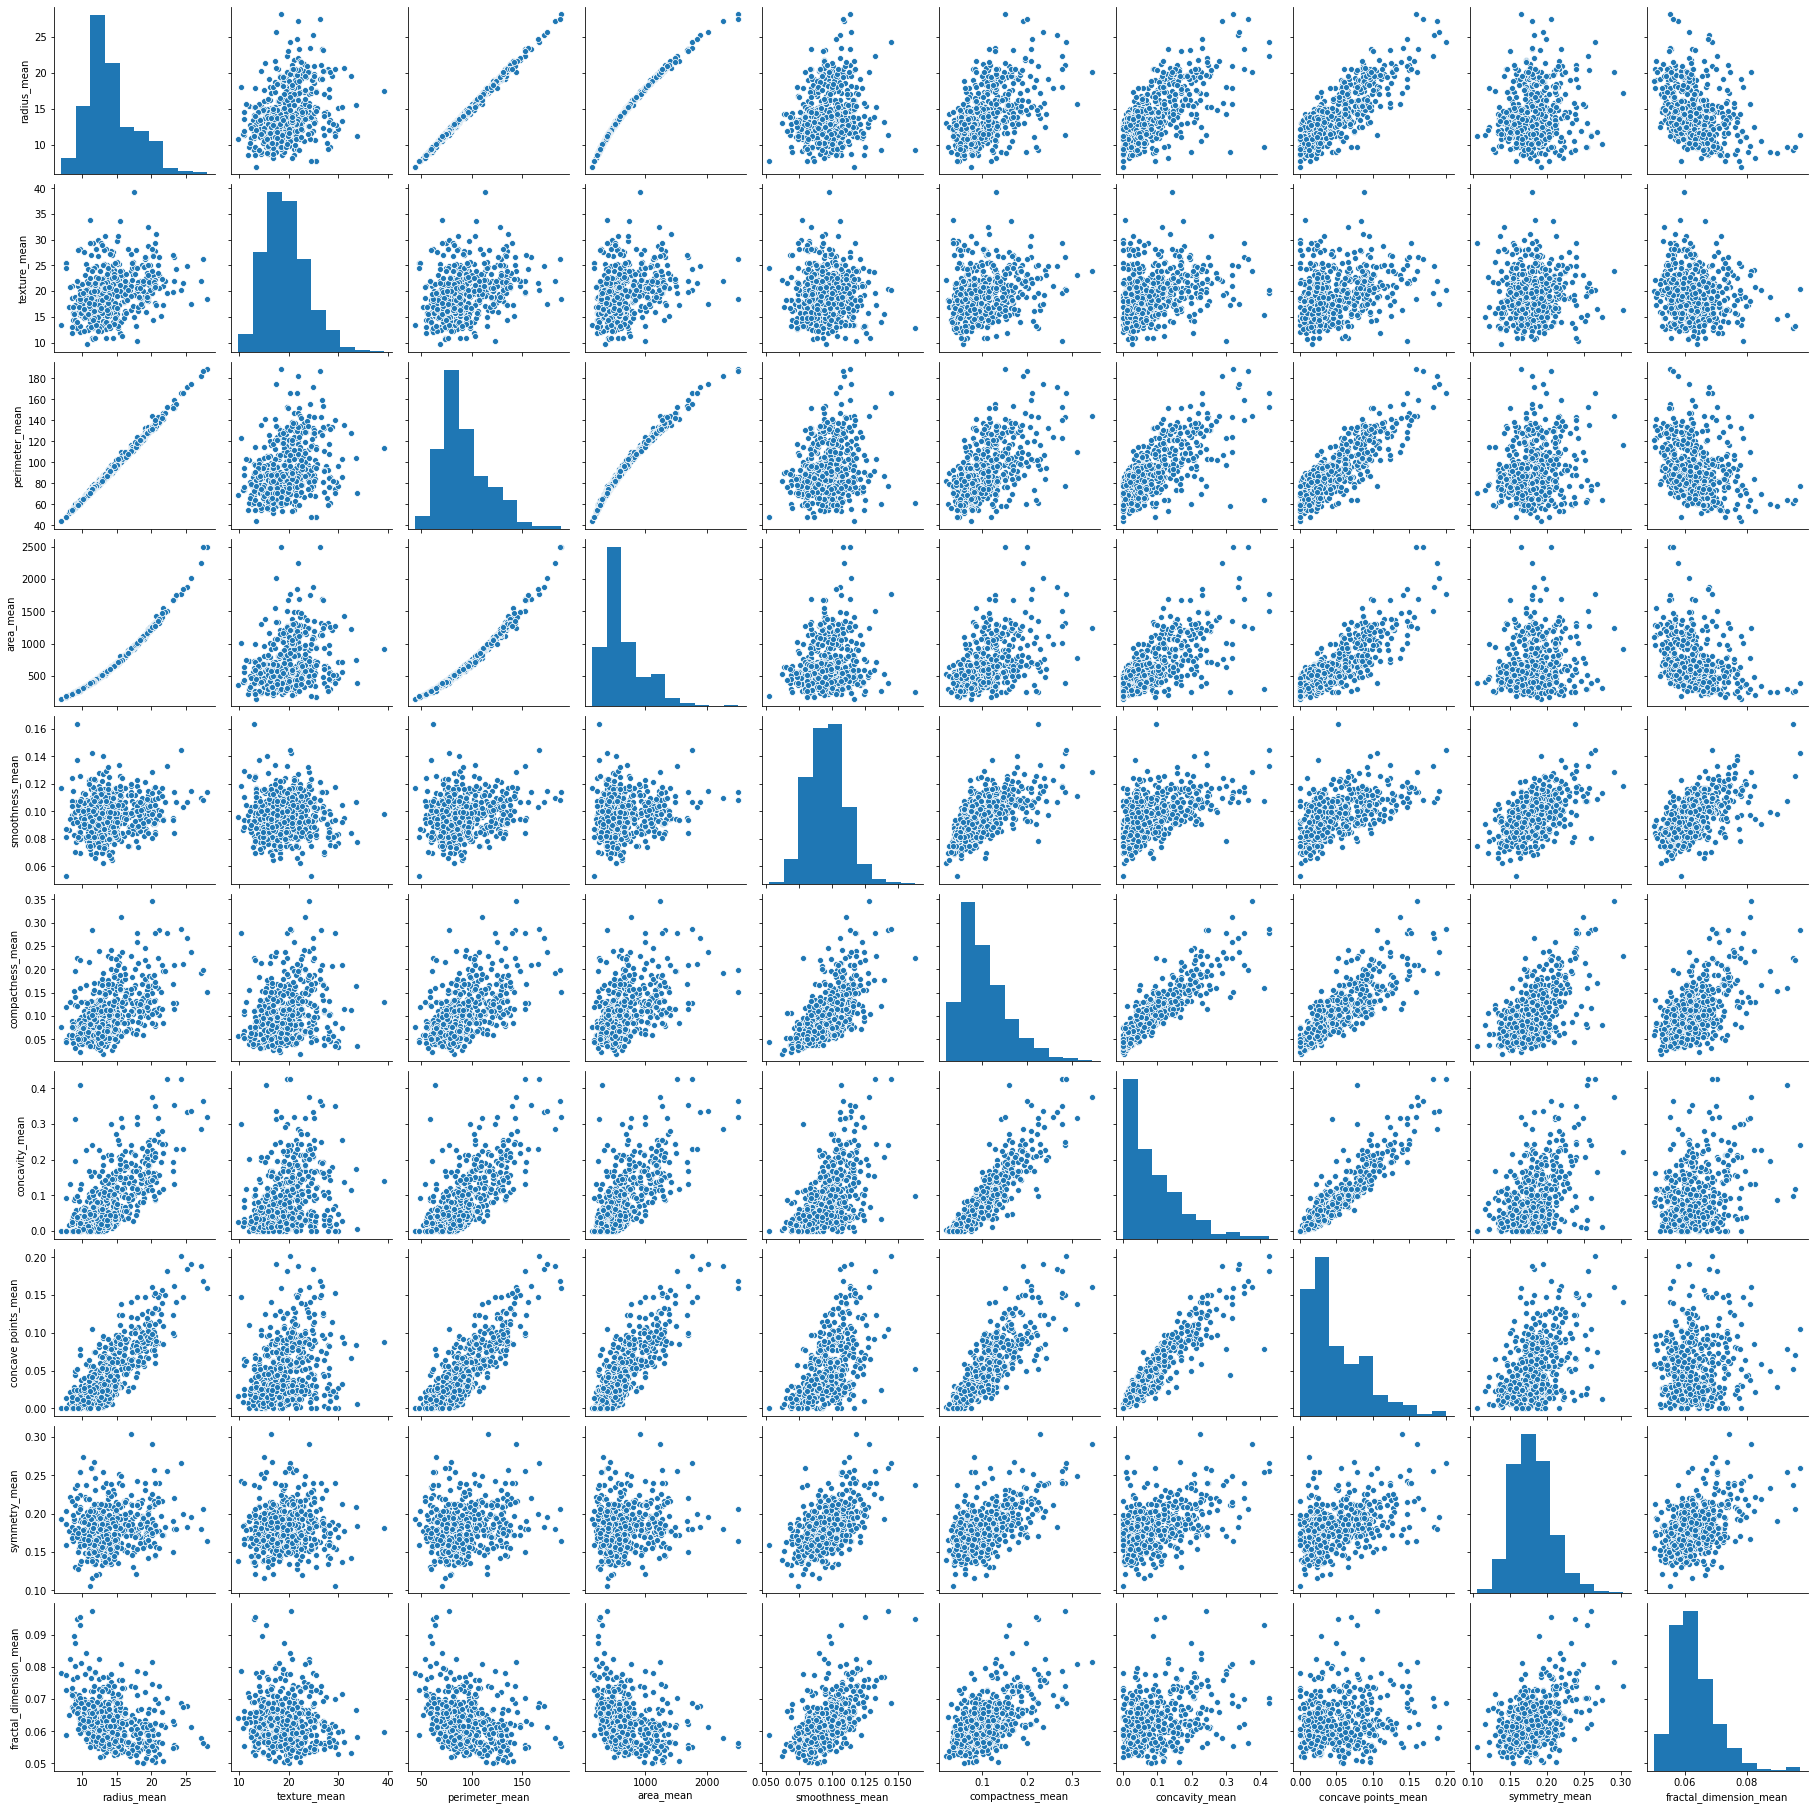

In [35]:
sns.pairplot(cancer[tumor_means])

The correlation between area, radius, and perimeter look extremely high, with some other noticeable correlations with concavity and compactness.  Making a heatmap with the correlations might show how close these similarities are.

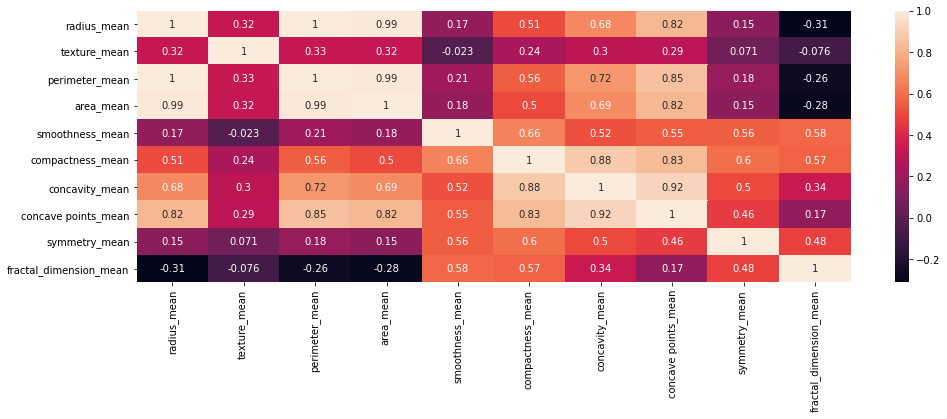

In [37]:
plt.figure(figsize = (16,5))
sns.heatmap(cancer[tumor_means].corr(), annot=True)

The correlation on some of these values is incredibly high.  The most obvious is radius mean, perimeter mean, and area mean.  This should be a direct correlation because perimeter and area are both determined by radius.  Therefore to prevent multicollinearity, perimeter and area will be removed from modeling.

Many other variables have high correlation and should be looked at closely.  We are going to consider anything with a correlation of 0.50 or higher a strong correlation.<br>
Radius with compactness, concavity, and concave points. (We are not considering perimeter or area in correlation since we are eliminating them)<br>
Smoothness with compactness, concavity, concave points, symmetry, and fractal dimensions.<br>
Concavity mean to compactness, concave points, and symmetry.

We will calculate the variance inflation factor with these, and if there are values greater than 5, then we will consider that a severe correlation and eliminate some determining variables.

In [88]:
#Create a function for VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [92]:
#first compare radius to these factors.  We are renaming concave points column for simplicity.
cancer.rename(columns={'concave points_mean': 'concave_points_mean'}, inplace=True)

In [91]:
X_1 = cancer[['radius_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean']] 
calc_vif(X_1)

,variables,VIF
0,radius_mean,8.747684
1,compactness_mean,15.770417
2,concavity_mean,21.116629
3,concave_points_mean,21.704401


The compactness mean, concavity mean, and concave points mean are too strongly correlated and will be removed from modeling.

In [93]:
#now compare smoothness.  Since we have eliminated concavity mean, concave points mean, and fractal dimensions meanI will not include them here.
X_2 = cancer[['smoothness_mean', 'symmetry_mean']]
calc_vif(X_2)

,variables,VIF
0,smoothness_mean,52.589015
1,symmetry_mean,52.589015


Symmetry is highly correlated with smoothness and can be removed from modeling. We will now move on to comparing the correlation of each variable mean to its standard error and its worst.

#### Comparing the mean, standard error, and worst of each determining variable

This process will be very similar to above, but I will only compare each common determining variable.  For example, I will compare radius mean to radius standard error to radius worst.  Then I will do the same for the other variables.  I want to compare even the variables I have decided to eliminate because the standard error and worst might be different and worth considering.

In [71]:
#make a variable for each group, then make a list of each to use in for loops
radius = ['radius_mean', 'radius_se', 'radius_worst']
texture = ['texture_mean', 'texture_se', 'texture_worst']
perimeter = ['perimeter_mean', 'perimeter_se', 'perimeter_worst']
area = ['area_mean', 'area_se', 'area_worst']
smoothness = ['smoothness_mean', 'smoothness_se', 'smoothness_worst']
compactness = ['compactness_mean', 'compactness_se', 'compactness_worst']
concavity = ['concavity_mean', 'concavity_se', 'concavity_worst']
concave_points = ['concave_points_mean', 'concave points_se', 'concave points_worst']
symmetry = ['symmetry_mean', 'symmetry_se', 'symmetry_worst']
fractal_dimension = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

all_variables = [radius, texture, perimeter, area, smoothness, compactness, concavity, concave_points, symmetry, fractal_dimension]

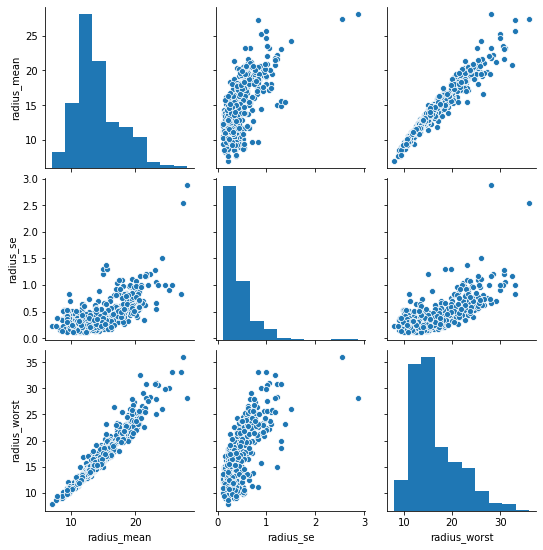

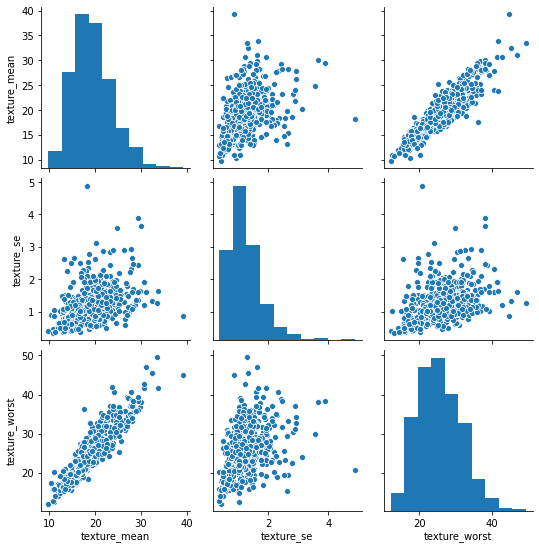

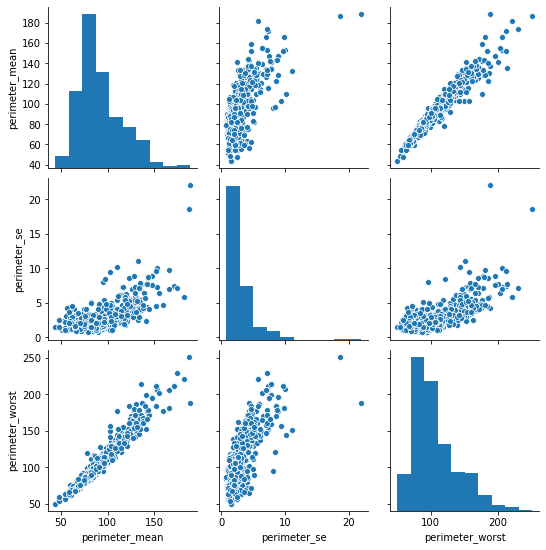

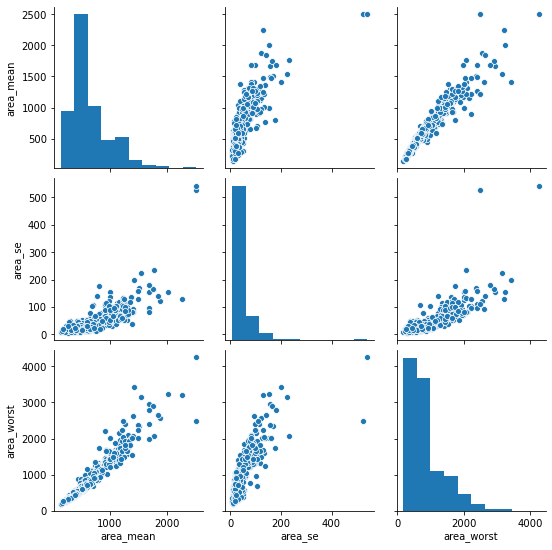

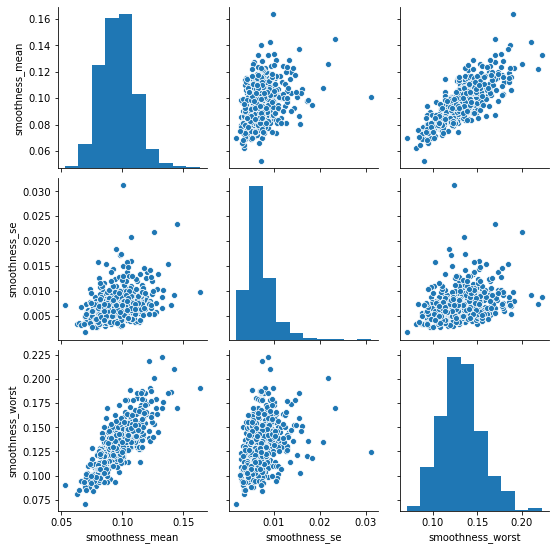

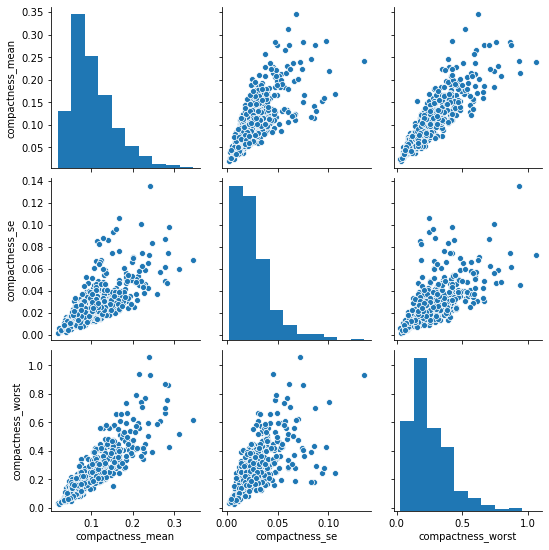

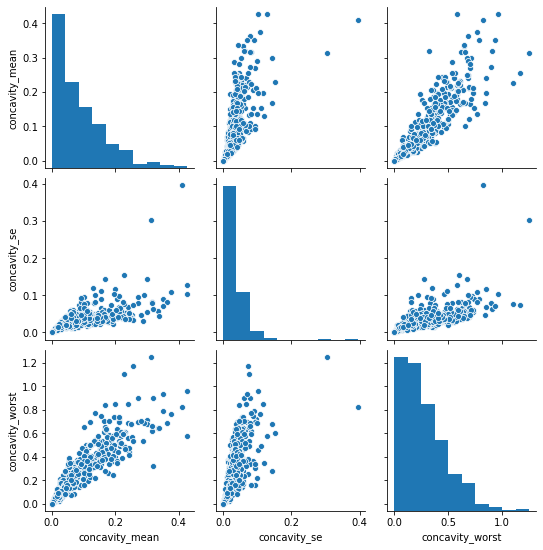

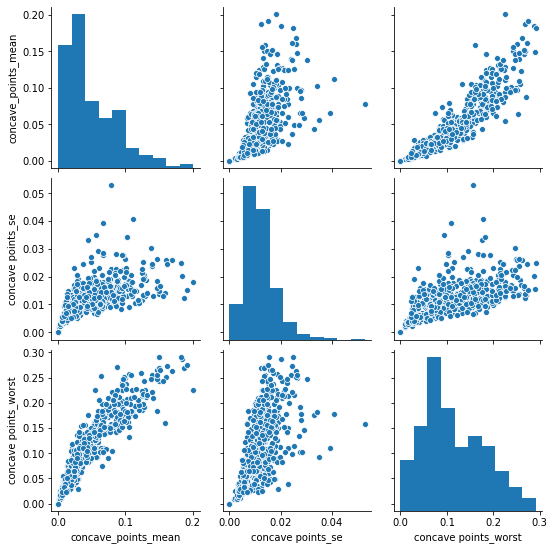

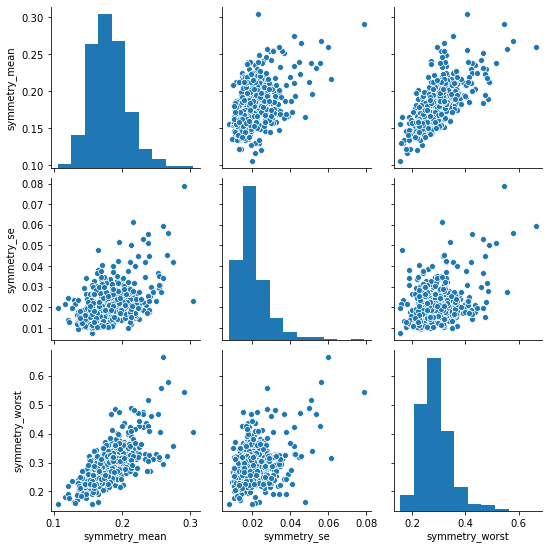

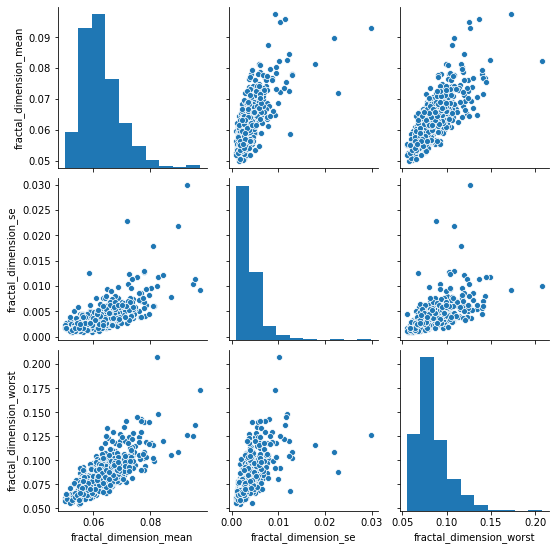

In [72]:
for i in all_variables:
    sns.pairplot(cancer[i])

Some did not seem as linear as I expected.  It is worth doing a heatplot to see the values.

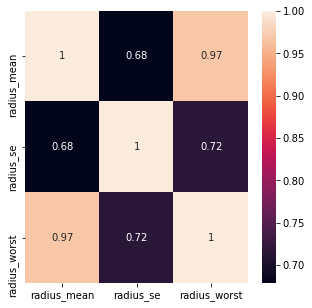

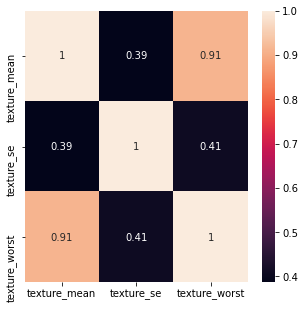

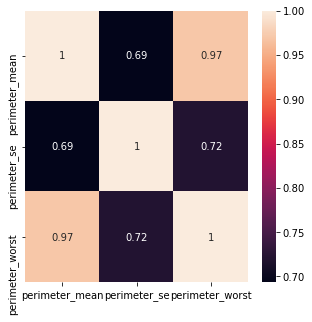

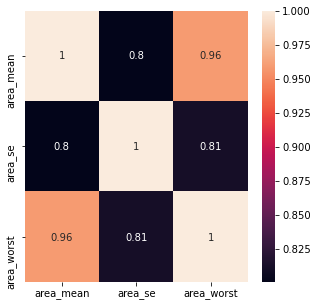

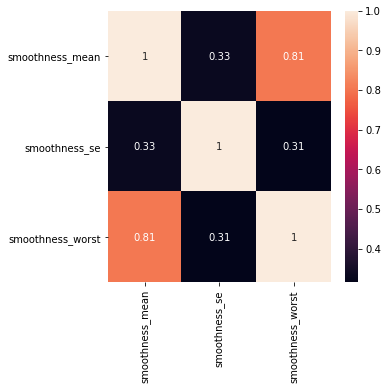

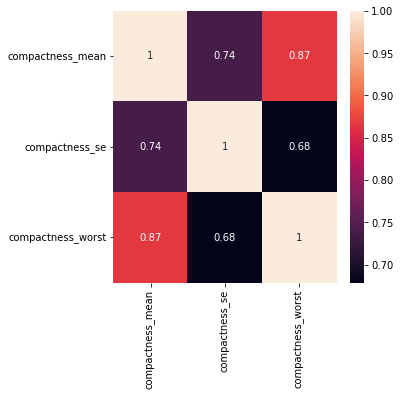

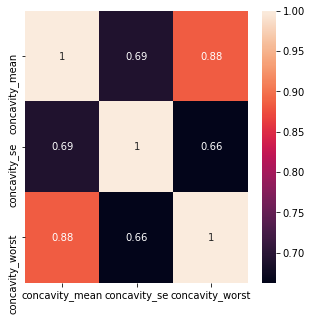

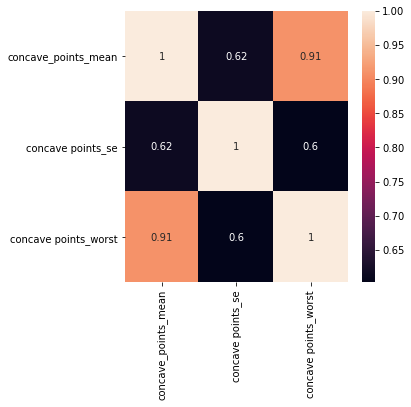

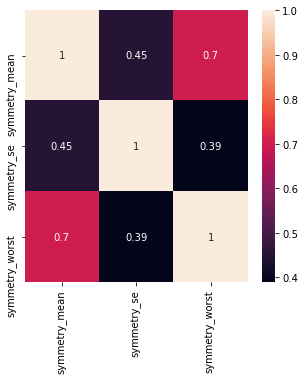

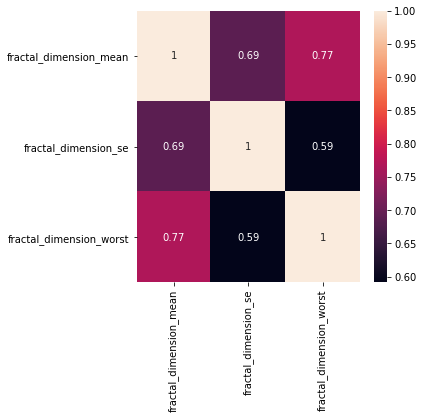

In [74]:
for i in all_variables:
    plt.figure(figsize = (5,5))
    sns.heatmap(cancer[i].corr(), annot=True)

There is a lot lower correlation of some of these than I thought.  The correlation of worst to mean remains pretty high, but the standard error fluctuates more.  

I will not take into consideration any of the worst variables because they all have a high correlation with mean, with the lowest being at 0.7.

The correlation for standard error is lower overall.  I am curious how well standard error determines if a tumor is malignant or benign.  If the standard error is high, then does that mean that the characteristics of the tumor fluctuate more?  I have decided to investigate standard error more.  

#### Examining standard error of the tumors

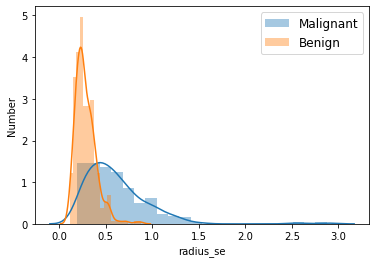

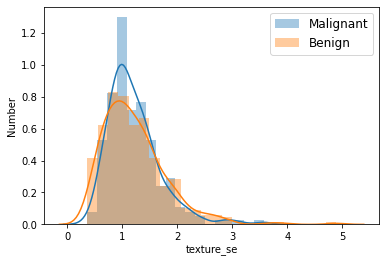

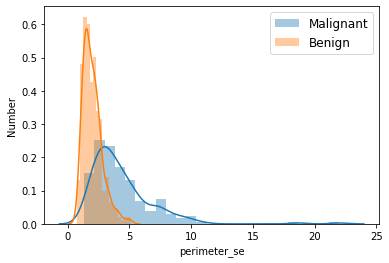

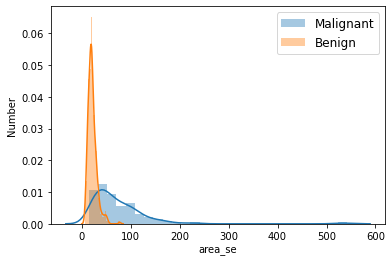

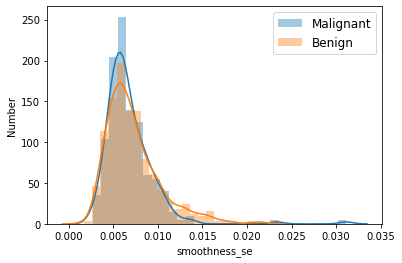

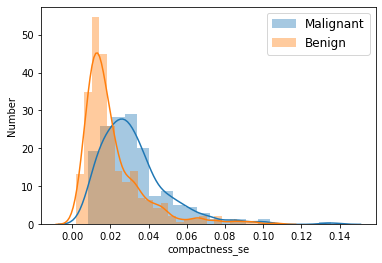

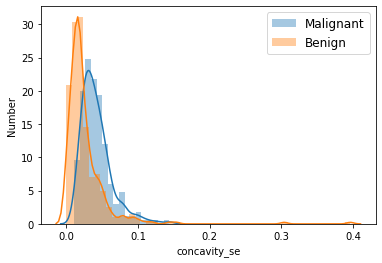

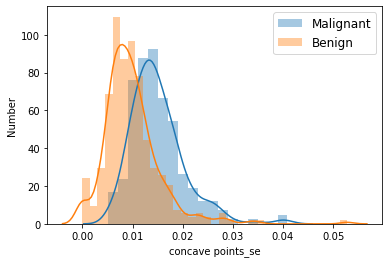

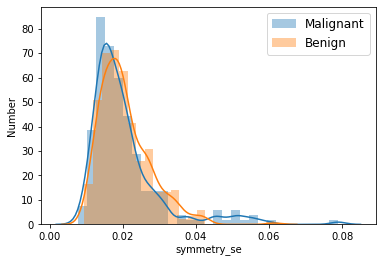

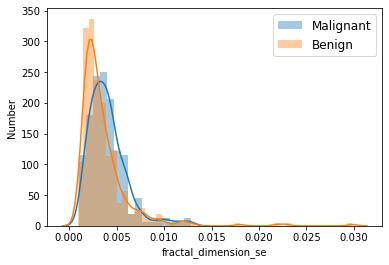

In [78]:
#Graph the correlation of standard error to malignant or benign

tumor_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

for i in tumor_se:
    sns.distplot(df_m[i], label= 'Malignant')
    sns.distplot(df_b[i], label= 'Benign')
    plt.legend(prop={'size': 12})
    plt.xlabel(i)
    plt.ylabel('Number')
    plt.show()

It is hard to tell the difference in most of these.  I will run a p-value test to determine their relevance.  The null hypothesis is the same before, the factors do not determine whether the tumor is benign or malignant. If the p-value is less thatn 0.05, we can reject the null hypothesis and say these factors are significant.

In [79]:
for i in tumor_se:
    t_test= stats.ttest_ind(df_m[i],df_b[i])
    print('The p-value for {0} is {1}'.format(i,t_test[1]))

The p-value for radius_se is 9.738948656461507e-50
The p-value for texture_se is 0.8433320287670163
The p-value for perimeter_se is 1.6519051758498057e-47
The p-value for area_se is 5.8955213926058635e-46
The p-value for smoothness_se is 0.11029660865789295
The p-value for compactness_se is 9.975994654074766e-13
The p-value for concavity_se is 8.260176167970051e-10
The p-value for concave points_se is 3.0723087688180654e-24
The p-value for symmetry_se is 0.8766418183858812
The p-value for fractal_dimension_se is 0.06307355082239346


The standard error for radius, perimeter, area, compactness, concavity, and concave points all reject the null hypothesis and seem to be significant in determining whether a tumor is benign or malignant. For each one of these, I will run the VIF to see if they are too closely correlated to the mean.  If it is a value greater than 5, I will remove them from modeling. To save time, I am going to use the variables from above, although I am not taking into consideration worst.

In [95]:
#radius VIF
calc_vif(cancer[radius])

,variables,VIF
0,radius_mean,178.174801
1,radius_se,6.120714
2,radius_worst,200.644972


The VIF for standard error is higher than 5 and can be removed from modeling.

In [96]:
#perimeter VIF
calc_vif(cancer[perimeter])

,variables,VIF
0,perimeter_mean,163.571882
1,perimeter_se,5.871551
2,perimeter_worst,182.753323


The VIF for standard error is higher than 5 and can be removed from modeling.

In [98]:
#area VIF
calc_vif(cancer[area])

,variables,VIF
0,area_mean,36.950358
1,area_se,4.721873
2,area_worst,42.714989


The VIF for standard error is lower than 5 for area, so it will be included in the modeling

In [99]:
calc_vif(cancer[compactness])

,variables,VIF
0,compactness_mean,18.190405
1,compactness_se,6.754351
2,compactness_worst,14.540889


The VIF for standard error is higher than 5 and can be removed from modeling.

In [100]:
calc_vif(cancer[concavity])

,variables,VIF
0,concavity_mean,11.181349
1,concavity_se,4.023188
2,concavity_worst,10.872855


The VIF for standard error is lower than 5 for concavity, so it will be included in the modeling.

In [101]:
calc_vif(cancer[concave_points])

,variables,VIF
0,concave_points_mean,13.094715
1,concave points_se,5.679160
2,concave points_worst,17.858332


The VIF for standard error is higher than 5 and can be removed from modeling.

In [103]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_num'],
      dtype='object')

#### Conclusion

Almost all of this data was significant and useful in predicting whether a tumor was benign or malgnant.  However, the correlation was extremely high, so most of the determining variables will be removed for modeling to reduce multicollinearity.  The determining variables that we are going to retain are:

radius mean<br>
texture mean<br>
smoothness mean<br>
area standard error<br>
concavity standard error

These will be combined with the diagnosis for modeling.

In [104]:
cancer_model = cancer[['diagnosis', 'diagnosis_num','radius_mean', 'texture_mean', 'smoothness_mean', 'area_se', 'concavity_se']]
cancer_model.head()

,diagnosis,diagnosis_num,radius_mean,texture_mean,smoothness_mean,area_se,concavity_se
id,,,,,,,
842302,M,1,17.99,10.38,0.11840,153.40,0.05373
842517,M,1,20.57,17.77,0.08474,74.08,0.01860
84300903,M,1,19.69,21.25,0.10960,94.03,0.03832
84348301,M,1,11.42,20.38,0.14250,27.23,0.05661
84358402,M,1,20.29,14.34,0.10030,94.44,0.05688


In [105]:
cancer_model.to_csv('cancer_model.csv')